Best hyperparameters for Ridge: {'ridge__alpha': 1.0}


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters for MLPRegressor: {}
Epoch 1/100


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 16.9076 - val_loss: 13.1217
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1657 - val_loss: 12.4794
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.3518 - val_loss: 10.3931
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.3243 - val_loss: 9.1006
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2520 - val_loss: 7.3176
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5446 - val_loss: 7.8242
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.5068 - val_loss: 7.6147
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5309 - val_loss: 7.0691
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3682 - val_loss: 7.0430
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1434 - val_loss: 6.5132
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6036 - val_loss: 6.3904
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7123 - val_loss: 6.4066
Epo

C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be remove

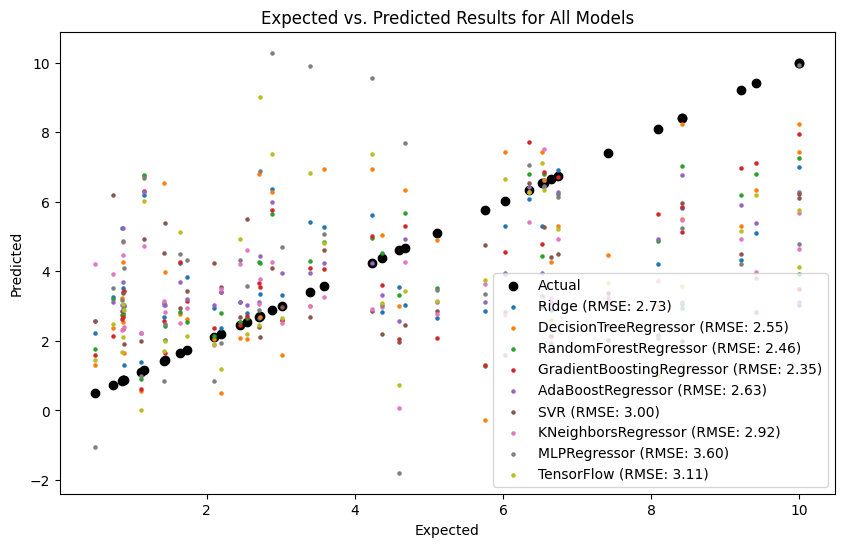

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the data
file_path = "combined.xlsx"
data = pd.read_excel(file_path)

# Define columns
data_columns = [
    'Wetland Type - Provincial Class',
    'Wetland Type - Federal Class',
    'Water Regime Indicator',
    'Specific Vegetation Type',
    '% Vegetation Cover for Specific Vegetation Cover Types',
    '% High Woody Canopy Cover (>5m)',
    'Phragmites present (Y/N)',
    'Soil Type',
    '% of Surface Water Present',
    'Depth of Saturation (cm)',
    'Average Depth of Living Moss (cm)',
    'Average Total Depth of Organics',
    'Average Organic Depth (cm)',
    'Hydrogeomorphic Class',
    '% Moss Cover'
]

results_columns = ['WS']

# Prepare data for regression
X = data[data_columns]
y = data[results_columns[0]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(),
    AdaBoostRegressor(), SVR(), KNeighborsRegressor(), MLPRegressor(max_iter=1000)
]

# Define hyperparameters to search for each model
param_grid = {
    'Ridge': {'ridge__alpha': [0.1, 0.5, 1.0]},
    'MLPRegressor': {}
}

# Train and tune hyperparameters for each model
best_models = {}

for model in models + ['TensorFlow']:  # Add TensorFlow model to the loop
    if model == 'TensorFlow':
        # Define the TensorFlow model
        model_tf = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
        ])

        # Compile the TensorFlow model
        model_tf.compile(optimizer='adam', loss='mean_squared_error')

        # Standardize the data for TensorFlow model
        scaler_tf = StandardScaler()
        X_train_scaled_tf = scaler_tf.fit_transform(X_train)
        X_test_scaled_tf = scaler_tf.transform(X_test)

        # Train the TensorFlow model
        model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

        # Evaluate the TensorFlow model
        y_pred_tf = model_tf.predict(X_test)
        rmse_tf = mean_squared_error(y_test, y_pred_tf, squared=False)
        print(f"TensorFlow RMSE: {rmse_tf}")

        # Add TensorFlow model to best_models
        best_models['TensorFlow'] = (model_tf, y_pred_tf)
    else:
        model_name = model.__class__.__name__
        pipeline = make_pipeline(model)

        # Perform grid search for hyperparameters
        if model_name in param_grid:
            grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_models[model_name] = (grid_search.best_estimator_, grid_search.predict(X_test))
            print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
        else:
            pipeline.fit(X_train, y_train)
            best_models[model_name] = (pipeline, pipeline.predict(X_test))

# Plot expected vs. predicted results for all models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='black', label='Actual')

for model_name, (model, y_pred) in best_models.items():
    if model_name == 'TensorFlow':
        plt.scatter(y_test, y_pred, label=f'{model_name} (RMSE: {rmse_tf:.2f})', s=5)
    else:
        plt.scatter(y_test, y_pred, label=f'{model_name} (RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f})', s=5)

plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Expected vs. Predicted Results for All Models')
plt.legend()

plt.savefig("PR_Benefit_all_plot.png")
plt.show()